### Data engineering steps:
    1. Inspected the .CSV files to understand their structure, data type for each column and 
    possible relationships between the files.
    
    2. Using http://www.quickdatabasediagrams.com created an ERD to represent the structure of 
    the .CSV files and the relationships between then. Created Primary and Foreign Key 
    constraints to relate the tables as required. The tables dept_danager, dept_emp, titles 
    and salaries all have from_date and to_date which seems to indicate they may track changes 
    of the data over time e.g. dept_manager may store the history of managers for all the 
    departments (many managers TO one department over time). For that reason, a may TO one 
    relationship was selected for all the relationships between the tables.
    
    3. Generated a PostgreSQL script, out of the modeling tool, to create the tables and their FK constraints.
    
    4. Logged on to pgAdmin and created the database called pewletthackard_db to host the required tables.
    
    5. Executed the script created in step 3 to create the tables and their constraints.
    
    6. Imported the data into each of the each of the tables from their respective sources. A 
    parent-first approach was used for importing the data to avoid referential constraints 
    issue, therefore the data for the departments and employees tables were imported first; 
    followed by the rest of the tables (in no particular order)
    
    7. Created a script (Tables_row_count_after_import.sql) that confirmed that indeed most of 
    the child tables track data changes over time; with the exception of salaries that contains 
    the same number of rows as the employees table.
    
### Epilogue
It's good to have a boss with a sense of homour and find out it was all an April Foolsday joke.

In [1]:
%matplotlib inline

In [2]:
#The databaseconfig.py file contains a datadict with the following structure:
#        psql = { 'server' : '<server_name>',   #default: postgresql
#                'host': '<host_name>',         #default: localhost
#                'port': '<port_number>',       #default: 5432
#                'user': '<user_name>',
#                'passwd': '<password>',
#                'db': '<database_name>'}

In [29]:
import pandas as pd
from sqlalchemy import create_engine
import databaseconfig as cfg
import matplotlib.pyplot as plt

In [4]:
connection_string = (f"{cfg.psql['server']}://{cfg.psql['user']}:{cfg.psql['passwd']}@{cfg.psql['host']}:{cfg.psql['port']}/{cfg.psql['db']}")
engine = create_engine(connection_string)
connection = engine.connect()


In [16]:
results = connection.execute('SELECT ttl.title, round(avg(sal.salary),2) AS "average salary" FROM salaries sal JOIN titles ttl on sal.emp_no = ttl.emp_no GROUP BY ttl.title;')

In [17]:
salaries_title = pd.DataFrame(results.fetchall()).rename(columns={0:"Employee Title",1:"Average Salary ($)"})

In [18]:
salaries_title["Average Salary ($)"] = salaries_title["Average Salary ($)"].astype(float)

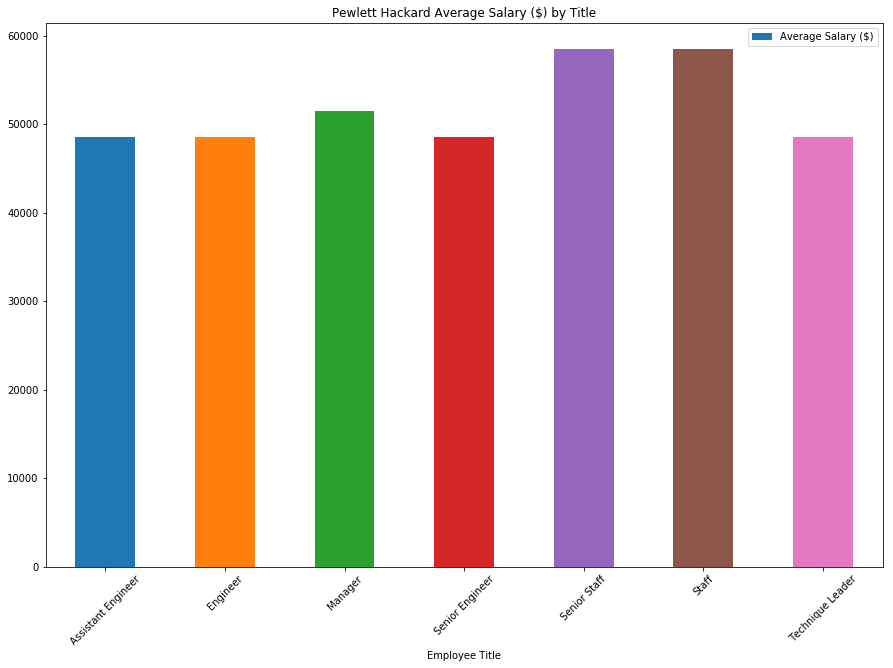

In [33]:
salaries_title.plot.bar(x="Employee Title",y="Average Salary ($)",figsize=(15, 10), rot=45,title="Pewlett Hackard Average Salary ($) by Title")
plt.savefig("Pewlett Hackard Average Salary by Title.png")
plt.show()